In [1]:
from copy import deepcopy 
from sklearn.datasets import make_blobs 
from itertools import product 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import random
%matplotlib inline

Зададим размер и стиль наших графиков:

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Создадим датасет из случайных значений, собранных в кластеры с помощью специальной функции:

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5) 

columns = ['C' + str(x) for x in np.arange(1, 11, 1)] #создание столбцов, их номер увеличиваем на 1 за шаг
d = {key: values for key, values in zip(columns, X.T)} #совмещение столбцов
data = pd.DataFrame(d) #создание самого датафрейма
data.head()

,C1,C2
0,-8.881579,0.011115
1,-0.982773,-9.499160
2,7.921502,-0.464618
3,8.068672,-0.096227
4,-7.858075,1.092815


Построим график с помощью полученных данных и занесём данные в список кортежами из координат точек:

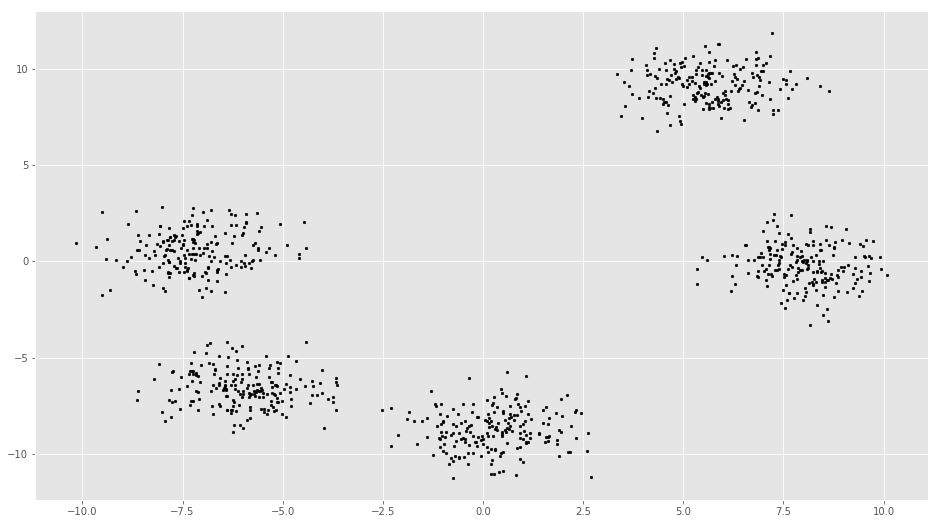

In [4]:
# Getting the values and plotting it

C1 = data['C1'].values
C2 = data['C2'].values

X = np.array(list(zip(C1, C2)))

plt.scatter(C1, C2, c='black', s=7)

Зададим случайные начальные координаты центроидов:

In [5]:

k = 4 #количество центроидов
Cx = np.random.randint(0, np.max(X)+2, size=k) #Х центроидов
Cy = np.random.randint(0, np.max(X)+2, size=k) #Y центроидов
C = np.array(list(zip(Cx, Cy)), dtype=np.float32) #Запакуем координаты в кортежи
print(C)

[[ 7.  1.]
 [11. 11.]
 [ 6.  0.]
 [11.  0.]]


Построим график с центроидами:

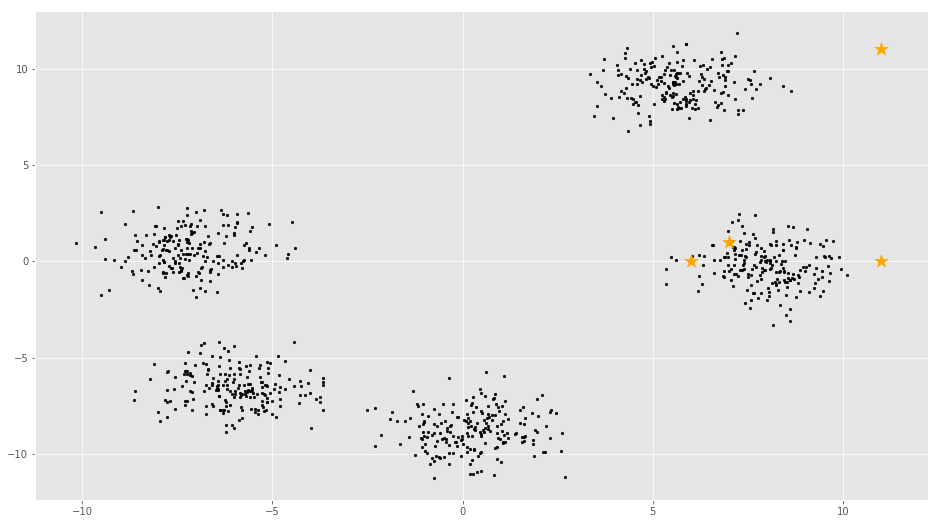

In [6]:
plt.scatter(C1, C2, c='black', s=7)
plt.scatter(Cx, Cy, marker='*', s=200, c='orange')

Воспользуемся алгоритмом Евклида для вычисления расстояния до точки:

In [7]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

Используем сам алгоритм для выполнения кластеризации:

In [8]:
 
C_old = np.zeros(C.shape) # Массив нужного размера, заполненный нулями для записи значений центроидов

clusters = np.zeros(len(X)) # Номера кластеров(0, 1, 2)

distance = dist(C, C_old, None)# Расстояние между предыдущим и новым положением центроида

while distance != 0:
    
    for i in range(len(X)): # Собираем точки в ближайшие кластеры
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    C_old = deepcopy(C)# Сохраняем старые положения центроидов
    
    for i in range(k):# Находим новые положения центроидов
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            try:
                C[i] = np.mean(points, axis=0)
            except:
                print(points)
            distance = dist(C, C_old, None)

Построим полученную кластеризацию с помощью цветных подграфиков:

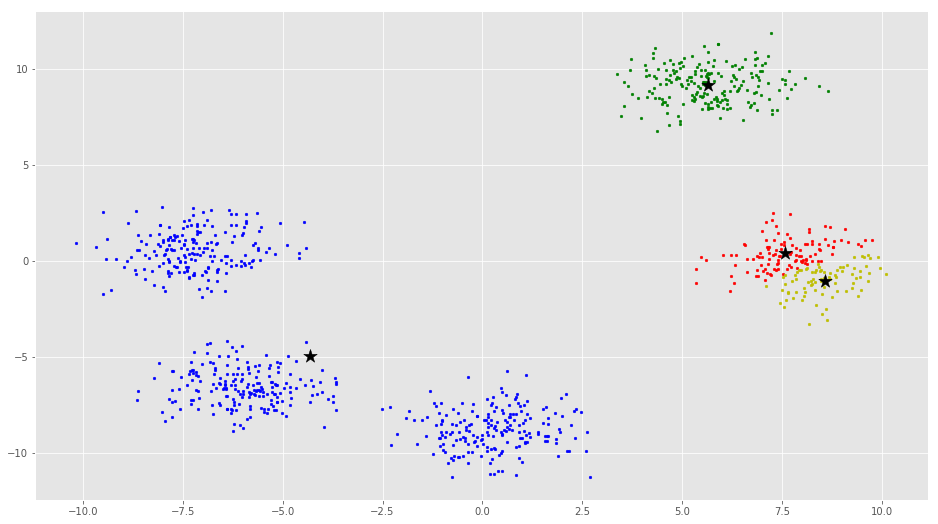

In [11]:
colors = ['r', 'g', 'b', 'y']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')

Как можно заметить, данный алгоритм несовершенен.